In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(27)

# Data Generation

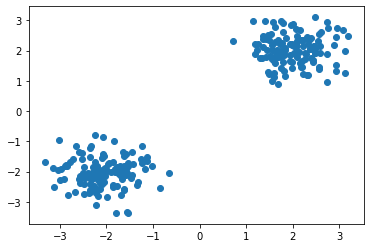

In [2]:
n_samples = 300
outliers_fraction = 0.15

# Total number of outlier point
n_outliers = int(outliers_fraction * n_samples)

# Total nummber of normal point
n_inliers = n_samples - n_outliers

# Parameter for data generation
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
inlier_data =  make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0]
#didn't understood above line

plt.scatter(inlier_data[:, 0], inlier_data[:, 1])

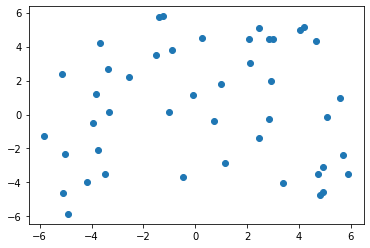

In [3]:
# Randomly sample data from uniform distribution
outlier_data = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))
#uniform distributed means each data point have equal chance of existence 
plt.scatter(outlier_data[:, 0], outlier_data[:, 1])

In [4]:

data = np.concatenate([inlier_data, outlier_data], axis=0)
#plt.scatter(data[:, 0], data[:, 1])

# Outliers Detection

In [5]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### Elliptic Envelope

In [6]:
#gaussian distribution or normal distribution means all the points are near to mean.
#elipse vitra pare inlier bahira pare outlier distance used is not eulidian but mahalanobis
elliptic_envelope = EllipticEnvelope(random_state=0)
elliptic_envelope.fit(data)
#elliptic_envelope.predict([[6,-4]])
y_pred = elliptic_envelope.predict(data)
#y_pred

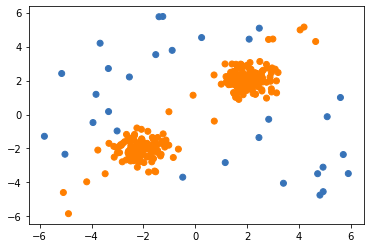

In [7]:
colors = np.array(['#3773b8', '#ff7f00'])
plt.scatter(data[:,0], data[:, 1], color=colors[(y_pred + 1)//2])
#plt.scatter(data[:,0], data[:, 1], c=y_pred)

### One Class SVM

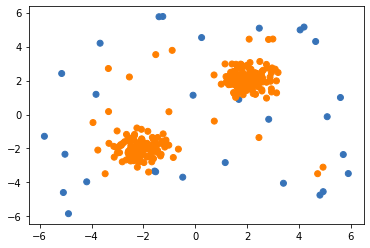

In [8]:
#we use one_class_svm for novelty outlier ie. we expect data to be good and train the model and svm draws the bouundry to 
#distinguish from outlier
one_class_svm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
one_class_svm.fit(data)
y_pred = one_class_svm.predict(data)

colors = np.array(['#3773b8', '#ff7f00'])
plt.scatter(data[:,0], data[:, 1], color=colors[(y_pred + 1)//2])

### Isolation Forest

In [9]:
clf = IsolationForest(random_state=0).fit(data)
y_pred_iso = clf.predict(data)


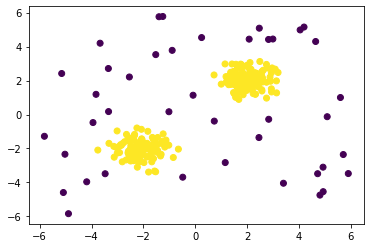

In [10]:
plt.scatter(data[:,0],data[:,1],c=y_pred_iso)

### Local Outlier

In [11]:
local_outlier = LocalOutlierFactor(n_neighbors=2)
local_outlier.fit(data)
y_pred_local = local_outlier.fit_predict(data)
#why to use fit_predict

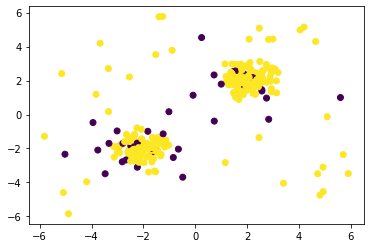

In [12]:
plt.scatter(data[:,0],data[:,1],c=y_pred_local)